# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

The following code is to make a LeNet based Traffic Sign Classfier from scratch using TensorFlow. Please go through the ReadMe for install instructions and other relevant information. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# The follwoing code section will create a directory with 
# the loaded dataset outside your code directory

import urllib.request 
import os
import zipfile

print("Dataset download started")

url = 'https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip'
dirName = "../dataset"
   
# Create target Directory if don't exist
if not os.path.exists(dirName):
    os.mkdir(dirName)
    print("Dataset directory created")
else:    
    print("Dataset directory already exists")

print("Downloading dataset, please wait..")
    
urllib.request.urlretrieve(url, '../dataset/dataset.zip')  

print("Dataset download finished ")

zip_ref = zipfile.ZipFile(dirName+'/dataset.zip', 'r')
zip_ref.extractall(dirName)
zip_ref.close()
os.remove(dirName+'/dataset.zip')

print("Dataset is now ready to be used")

Dataset download started
Dataset directory already exists
Dataset download finished 
Dataset is now ready to be used


In [2]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

#have put the dataset outside Project folder
traffic_signs_data_folder = '../dataset/' 
training_file = traffic_signs_data_folder + 'train.p'
validation_file= traffic_signs_data_folder + 'valid.p'
testing_file = traffic_signs_data_folder + 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

print ('Data loaded in Python')

Data loaded in Python


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

import pandas as pd
import numpy as np

# Making sure that the dataset is proper
assert (len(X_train) == len(y_train))
assert (len(X_valid) == len(y_valid))
assert (len(X_test)  == len(y_test))

# TODO: Number of training examples
n_train = len(y_train)

# TODO: Number of validation examples
n_validation = len(y_valid)

# TODO: Number of testing examples.
n_test = (y_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).size

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = [16  1 38 ...  6  7 10]
Image data shape = (32, 32, 3)
Number of classes = 43


### Exploratory visualization of the dataset

41


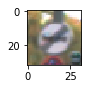

In [4]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

for index in range(100,101):
    image = X_train[index]
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    print(y_train[index])

In [5]:
# But what are those numbers?

import csv
import random
%matplotlib inline

classId2SignName = {}

with open('signnames.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        classId2SignName[row[0]] = row[1]
        
def visualizeImages(images,labels):
    n_columns = 8
    n_rows = int(len(images)/n_columns)+1
    width = 24
    height = n_rows * 3
    fig, axs = plt.subplots(n_rows,n_columns, figsize=(width, height))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    for i in range(n_columns * n_rows):
        axs[i].axis('off')
        if (i<len(images)):
            image = images[i]
            axs[i].axis('off')
            axs[i].imshow(image)
            axs[i].set_title('{} ({:.20})'.format(labels[i], classId2SignName[str(labels[i])]))


The following figures are the representation of all the 43 classes of the Dataset


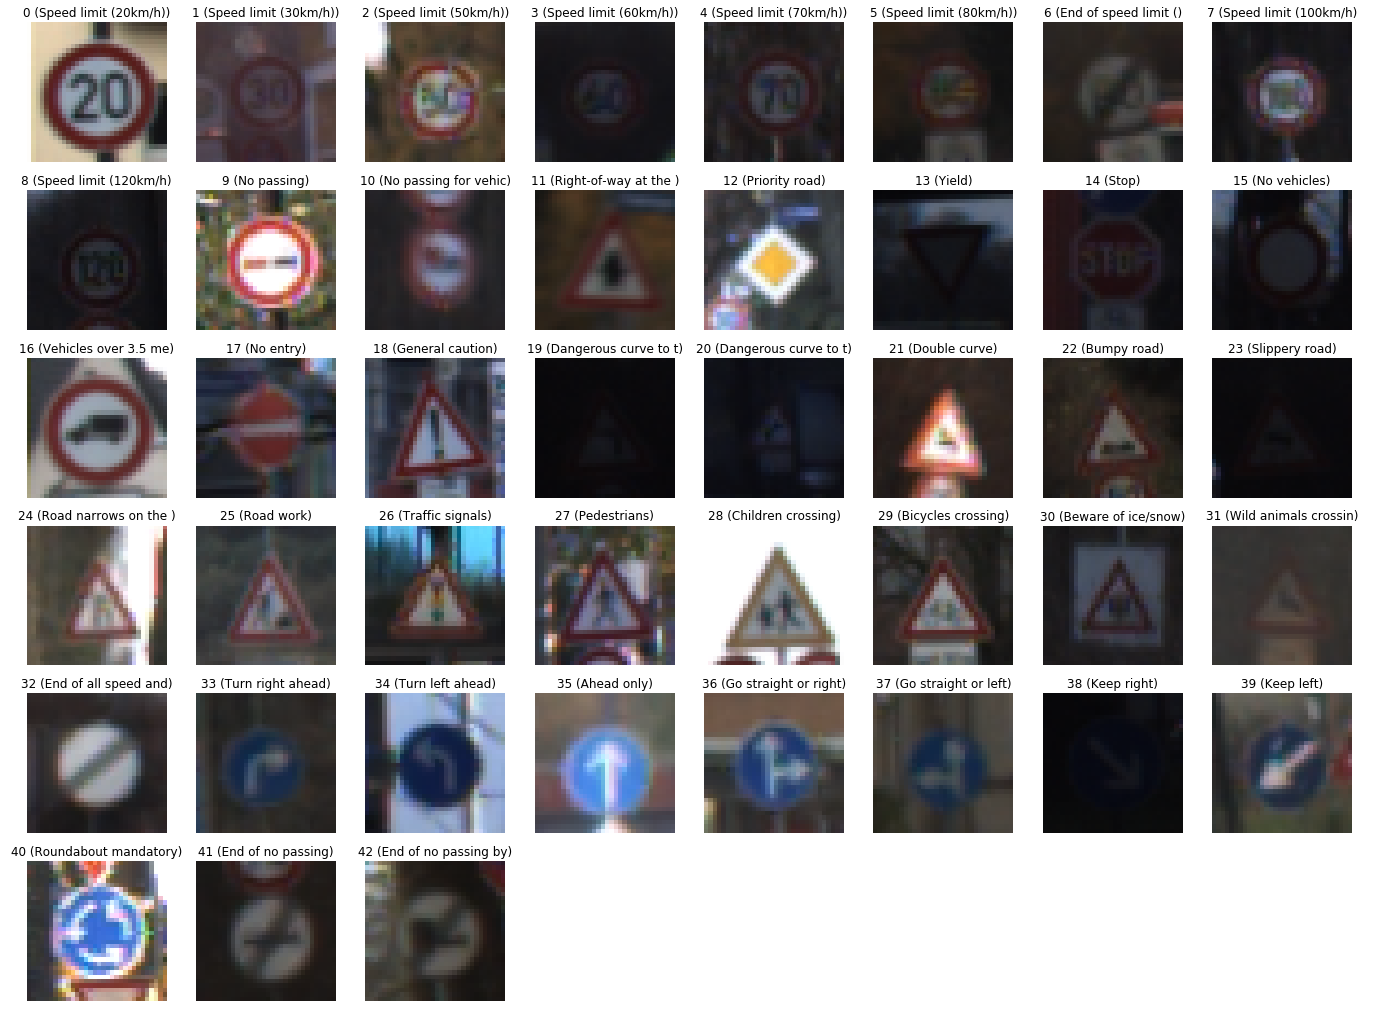

In [6]:
X = [] 
Y = []

labels, indices = np.unique(y_train, return_index=True)
for i in range(len(labels)):
    X.append(X_train[indices[i]])
    Y.append(labels[i])
        
visualizeImages(X,Y)

print ("The following figures are the representation of all the 43 classes of the Dataset")

This is the chart for number of images in each class


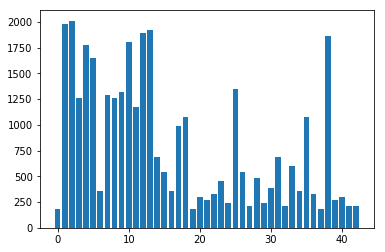

In [7]:
x,y = np.unique(y_train, return_counts=True)
plt.bar(x,y)
plt.show

print ('This is the chart for number of images in each class')

----

## Step 2: Design and Test a Model Architecture

Designing and implementing a deep learning model that learns to recognize traffic signs. The model is trained and tested on on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The models will be a modified version of LeNet architecure.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). 

### Pre-process the Data Set 

In [8]:
import cv2 

In [9]:
def preProcess(color_images):
    # grayscale
    grayscaled_images = np.sum(color_images/3, axis=3, keepdims=True)
    
    # normalize
    normalized_images = (grayscaled_images - 128) / 128
    
    
    return normalized_images

In [10]:
def getRandomImage(x, y, filter_index):
    indices, = np.nonzero( y==filter_index )
    index = np.random.choice(indices)
    return x[index]
    

image = getRandomImage(X_train, y_train, 23)

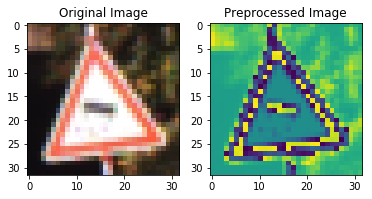

Shape of Original image: (34799, 32, 32, 3)
Shape of preprocessed image: (34799, 32, 32, 1)


In [11]:
preprocessed = preProcess(X_train)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
normalized_image = (gray - 128) / 128

f = plt.figure()

f1=f.add_subplot(1,2, 1)
f1.set_title('Original Image')
plt.imshow(image)

f2=f.add_subplot(1,2, 2)
f2.set_title('Preprocessed Image')
plt.imshow(normalized_image)

plt.show(block=True)


print ("Shape of Original image:",X_train.shape)
print ("Shape of preprocessed image:",preprocessed.shape)


## Model Architecture

### Shuffling of Dataset

In [12]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

In [13]:
# Defining TensorFlow parameter

import tensorflow as tf
from tensorflow.contrib.layers import flatten

In [17]:
# Defining TensorFlow variables 

keep_prob = tf.placeholder(tf.float32)
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32)


In [20]:
# My modiefied version of LeNet
rate = 0.001
def LeNet_modified(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(2, 2, 1, 10), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(10))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Layer 1: Activation.
    conv1 = tf.nn.relu(conv1)

    # Layer 1: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(2, 2,10, 20), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(20))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Layer 2: Activation.
    conv2 = tf.nn.relu(conv2)

    # Layer 2: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    fc0   = tf.nn.dropout(fc0, keep_prob)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(980, 400), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(400))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Layer 3: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1    = tf.nn.dropout(fc1, keep_prob) 


    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(400, 180), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(180))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Layer 4: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2    = tf.nn.dropout(fc2, keep_prob) 

    
    
    # Layer 5: Fully Connected. Input = 150. Output = 80.
    
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(180, 80), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(80))
    fc3    = tf.matmul(fc2, fc3_W) + fc3_b
    
    # Layer 5: Activation.
    fc3    = tf.nn.relu(fc3)
    fc3    = tf.nn.dropout(fc3, keep_prob) 
    
    
    
    # Layer 6: Fully Connected. Input = 80. Output = 43.
    fc4_W  = tf.Variable(tf.truncated_normal(shape=(80, 43), mean = mu, stddev = sigma))
    fc4_b  = tf.Variable(tf.zeros(43))


    logits = tf.matmul(fc3, fc4_W) + fc4_b
    
    return logits

In [ ]:
def DeepNet(x, dropout_keep_prob, cfg):
    # Hyper parameters
    mu = 0
    sigma = 0.1

    one_by_one, num_output_filters = convolutional_layer(x, num_input_filters=cfg.NUM_CHANNELS_IN_IMAGE, num_output_filters=3,
                                                        filter_shape=(1, 1), strides=[1,1,1,1], padding='SAME',
                                                        mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_1")

    # Convolutional Layer 1: Input 32x32x3         Output = 32x32x12
    conv1, num_output_filters = convolutional_layer(one_by_one, num_input_filters=3, num_output_filters=12,
                                                    filter_shape=(3, 3), strides=[1,1,1,1], padding='SAME',
                                                    mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_1")

    # Convolutional Layer 2: Input 32x32x12         Output = 28x28x24
    conv2, num_output_filters = convolutional_layer(conv1, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                                                    filter_shape=(5, 5), strides=[1,1,1,1], padding='VALID',
                                                    mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_2")

    # Convolutional Layer 3: Input 28x28x24         Output = 24x24x48
    conv3, num_output_filters = convolutional_layer(conv2, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                                                    filter_shape=(5, 5), strides=[1,1,1,1], padding='VALID',
                                                    mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_3")

    # Convolutional Layer 4: Input 24x24x48         Output = 16x16x96
    conv4, num_output_filters = convolutional_layer(conv3, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                                                    filter_shape=(9, 9), strides=[1,1,1,1], padding='VALID',
                                                    mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_4")

    # Now lets add Convolutional Layers with downsampling
    conv5, num_output_filters = convolutional_layer(conv4, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                                                    filter_shape=(3, 3), strides=[1,1,1,1], padding='SAME',
                                                    mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_5")

    # MaxPool Layer: Input 16x16x192                 Output = 16x16x384
    maxpool1 = tf.nn.max_pool(conv5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name="maxpool1")

    # Convolutional Layer 6: Input 16x16x384         Output = 8x8x384
    conv6, num_output_filters = convolutional_layer(maxpool1, num_input_filters=num_output_filters, num_output_filters=num_output_filters * 2,
                                                    filter_shape=(11, 11), strides=[1,1,1,1], padding='SAME',
                                                    mean=mu, stddev=sigma, activation_func=tf.nn.relu, name="conv2d_6")

    # MaxPool Layer: Input 8x8x384                 Output = 4x4x384
    maxpool2 = tf.nn.max_pool(conv6, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='SAME', name="maxpool2")

    # Fully Connected Layer
    fc0 = flatten(maxpool2)

    # Fully Connected: Input = 6144                Output = 3072
    fc1, output_size = fully_connected_layer(fc0, 6144, 3072, mu, sigma, tf.nn.relu, dropout_keep_prob, name="fc1")

    # Fully Connected: Input = 3072                Output = 1536
    fc2, output_size = fully_connected_layer(fc1, 3072, 1536, mu, sigma, tf.nn.relu, dropout_keep_prob, name="fc2")

    # Fully Connected: Input = 1536               Output = 768
    fc3, output_size = fully_connected_layer(fc2, 1536, 768, mu, sigma, tf.nn.relu, dropout_keep_prob, name="fc3")


    # Fully Connected: Input = 768               Output = 384
    fc4, output_size = fully_connected_layer(fc3, 768, 384, mu, sigma, tf.nn.relu, dropout_keep_prob, name="fc4")

    # Fully Connected: Input = 384               Output = 192
    fc5, output_size = fully_connected_layer(fc4, 384, 192, mu, sigma, tf.nn.relu, dropout_keep_prob, name="fc5")

    # Fully Connected: Input = 192               Output = 96
    fc6, output_size = fully_connected_layer(fc5, 192, 96, mu, sigma, tf.nn.relu, dropout_keep_prob, name="fc6")

    # Fully Connected: Input = 96               Output = 43
    # logits, output_size = fully_connected_layer(fc6, 96, 43, mu, sigma, tf.nn.relu, dropout_keep_prob, name="logits")
    logits, output_size = fully_connected_layer(fc6, 96, cfg.MAX_LABELS, mu, sigma,
                                                activation_func=None, dropout_prob=1.0, name="logits")
    return logits

In [21]:
logits = LeNet_modified(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [22]:
# PreProcess the dataset

X_train_preProcessed = preProcess(X_train)
X_valid_preProcessed = preProcess(X_valid)
X_test_preProcessed  = preProcess(X_test)

print("Finished Preprocessing")

Finished Preprocessing


### Training session

Training...

EPOCH 1 ...
Training Accuracy = 0.092
Validation Accuracy = 0.076

EPOCH 2 ...
Training Accuracy = 0.112
Validation Accuracy = 0.078

EPOCH 3 ...
Training Accuracy = 0.200
Validation Accuracy = 0.138

EPOCH 4 ...
Training Accuracy = 0.329
Validation Accuracy = 0.283

EPOCH 5 ...
Training Accuracy = 0.455
Validation Accuracy = 0.384

EPOCH 6 ...
Training Accuracy = 0.528
Validation Accuracy = 0.459

EPOCH 7 ...
Training Accuracy = 0.577
Validation Accuracy = 0.502

EPOCH 8 ...
Training Accuracy = 0.626
Validation Accuracy = 0.554

EPOCH 9 ...
Training Accuracy = 0.675
Validation Accuracy = 0.597

EPOCH 10 ...
Training Accuracy = 0.728
Validation Accuracy = 0.664

EPOCH 11 ...
Training Accuracy = 0.748
Validation Accuracy = 0.694

EPOCH 12 ...
Training Accuracy = 0.788
Validation Accuracy = 0.733

EPOCH 13 ...
Training Accuracy = 0.798
Validation Accuracy = 0.749

EPOCH 14 ...
Training Accuracy = 0.826
Validation Accuracy = 0.776

EPOCH 15 ...
Training Accuracy = 0.844
Valid

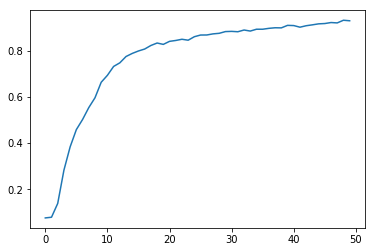

In [23]:
EPOCHS = 50
BATCH_SIZE = 1024
DROPOUT = 0.5


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    validation_accuracies = []
    
    for i in range(EPOCHS):
        X_train, X_train_preProcessed, y_train = shuffle(X_train, X_train_preProcessed, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_preProcessed[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: DROPOUT})
            
        training_accuracy = evaluate(X_train_preProcessed, y_train)
        validation_accuracy = evaluate(X_valid_preProcessed, y_valid)
        
        print("EPOCH {} ...".format(i+1))
        print("Training Accuracy = {:.3f}".format(training_accuracy))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        validation_accuracies.append(validation_accuracy)
        
    saver.save(sess, './lenet')
    
    # show learning statistics
    plt.plot(range(EPOCHS),validation_accuracies)
    plt.show
    
    print("Model saved")

In [24]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(X_test_preProcessed, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.908


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Done


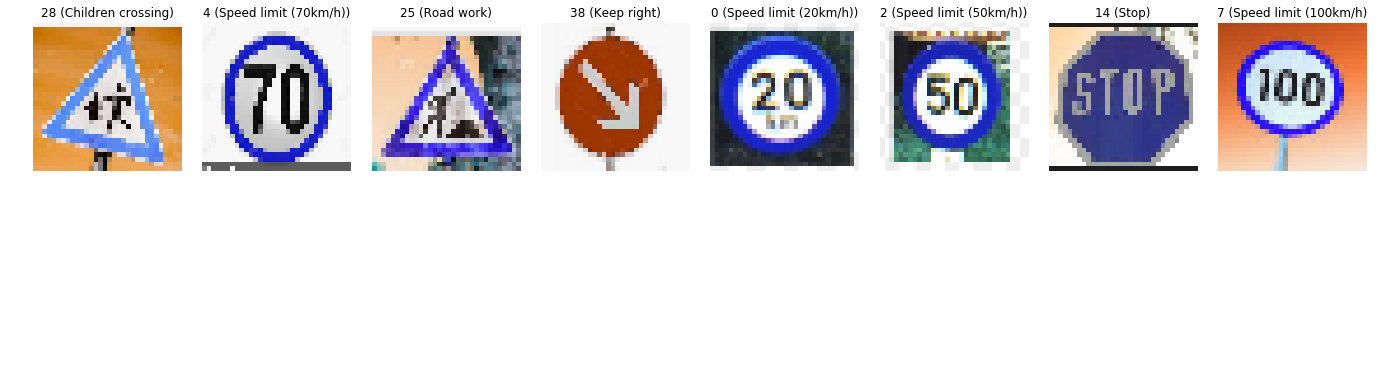

In [25]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

traffic_signs_data_folder = 'test_data/'
    
my_X_test = []
my_Y_test = []

for image_file in glob.glob(traffic_signs_data_folder + "*.png"):
    img = cv2.imread(image_file)
    img = cv2.resize(img, (32, 32))
    
    try:
        if (True):
        # the label is encoded into the first two characters of the file names
            label_str = image_file[len(traffic_signs_data_folder):][:2]
            label = int(label_str)
            my_X_test.append(img)
            my_Y_test.append(label)
    except  Exception:
        print ('Ignoring image {}'.format(image_file))


visualizeImages(my_X_test, my_Y_test)

print ('Done')

### Predict the Sign Type for Each Image

INFO:tensorflow:Restoring parameters from ./lenet
[28 36 25 38  0  2 14  2]


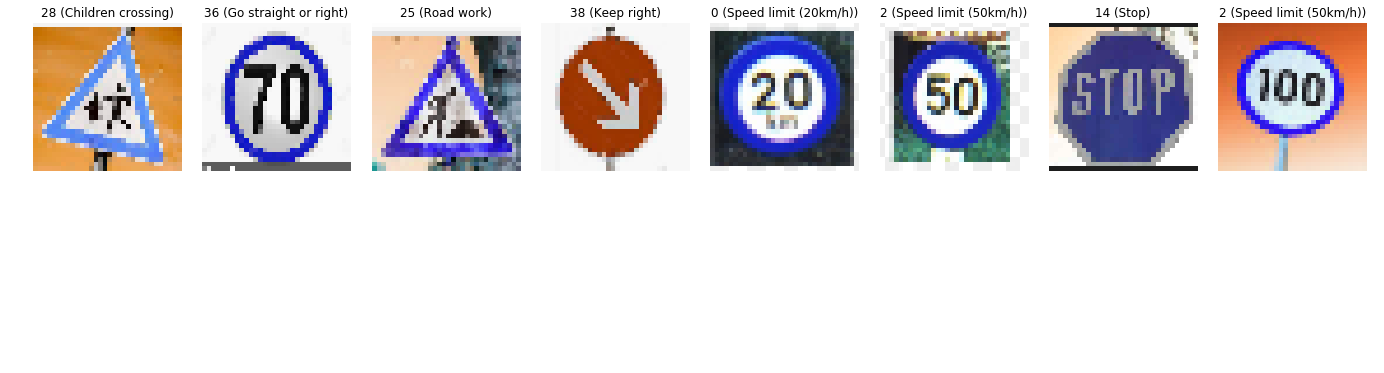

In [26]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

my_X_test_preProcessed = preProcess(np.array(my_X_test))

prediction=tf.argmax(logits,1)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    predictions = sess.run(prediction, feed_dict={x: my_X_test_preProcessed, keep_prob: 1.0})
    visualizeImages(my_X_test, predictions)
    
    print (predictions)

### Analyze Performance

In [27]:
### Calculate the accuracy for these 5 new images. 

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    test_accuracy = evaluate(my_X_test_preProcessed, my_Y_test)
    print("Custom Test Accuracy = {:.3f}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ./lenet
Custom Test Accuracy = 0.750


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [28]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

def visualizeTop_k(test_images, train_images, top_k):
    probabilities = top_k.values
    indices = top_k.indices
    assert (len(test_images) == len(indices))
          
    n_columns = 6
    n_rows = len(indices)
    width = 24
    height = n_rows * 3
    fig, axs = plt.subplots(n_rows,n_columns, figsize=(width, height))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    i = 0
    for row in range(n_rows):
        axs[i].axis('off')
        axs[i].imshow(test_images[row])
        #axs[i].set_title('{} ({:.20})'.format(labels[i], classId2SignName[str(labels[i])]))
        i += 1
        for j in range(len(indices[row])):
            index = indices[row][j]
            probability = probabilities[row][j]
            axs[i].axis('off')
            axs[i].set_title('{:.2f}% ({} {:.20})'.format(probability*100, index,  classId2SignName[str(index)]))
            axs[i].imshow(getRandomImage(X_train, y_train, index))
            i += 1

done


In [29]:
def visualizeTop_k2(test_images, train_images, top_k):
    probabilities = top_k.values
    indices = top_k.indices
    assert (len(test_images) == len(indices))
          
    n_columns = 2
    n_rows = len(indices)
    width = 24
    height = n_rows * 3
    fig, axs = plt.subplots(n_rows,n_columns, figsize=(width, height))
    fig.subplots_adjust(hspace = .2, wspace=.1)
    axs = axs.ravel()
    i = 0
    for row in range(n_rows):
        axs[i].axis('off')
        axs[i].imshow(test_images[row])
        i += 1
        labs=[classId2SignName[str(j)] for j in indices[row]]
        axs[i].barh(labs, probabilities[row])
        
        #axs[i].yticks(np.arange(1, 6, 1), labs)
        i += 1

done


INFO:tensorflow:Restoring parameters from ./lenet
done


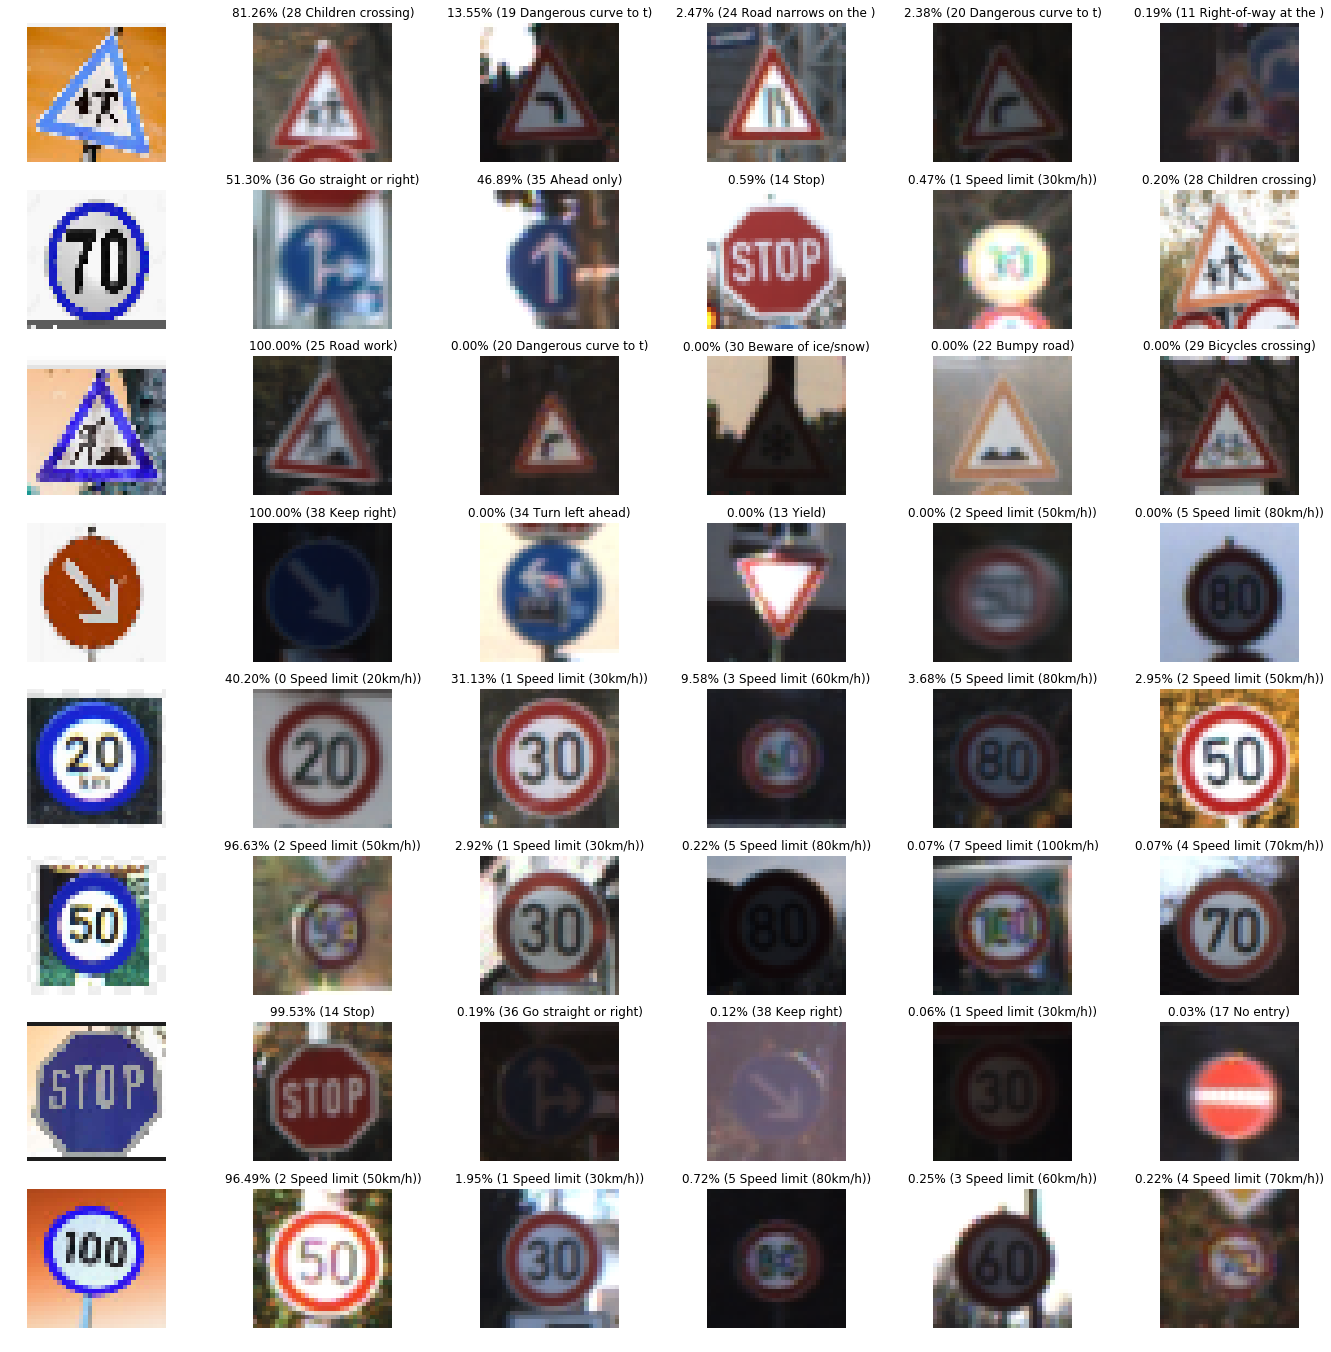

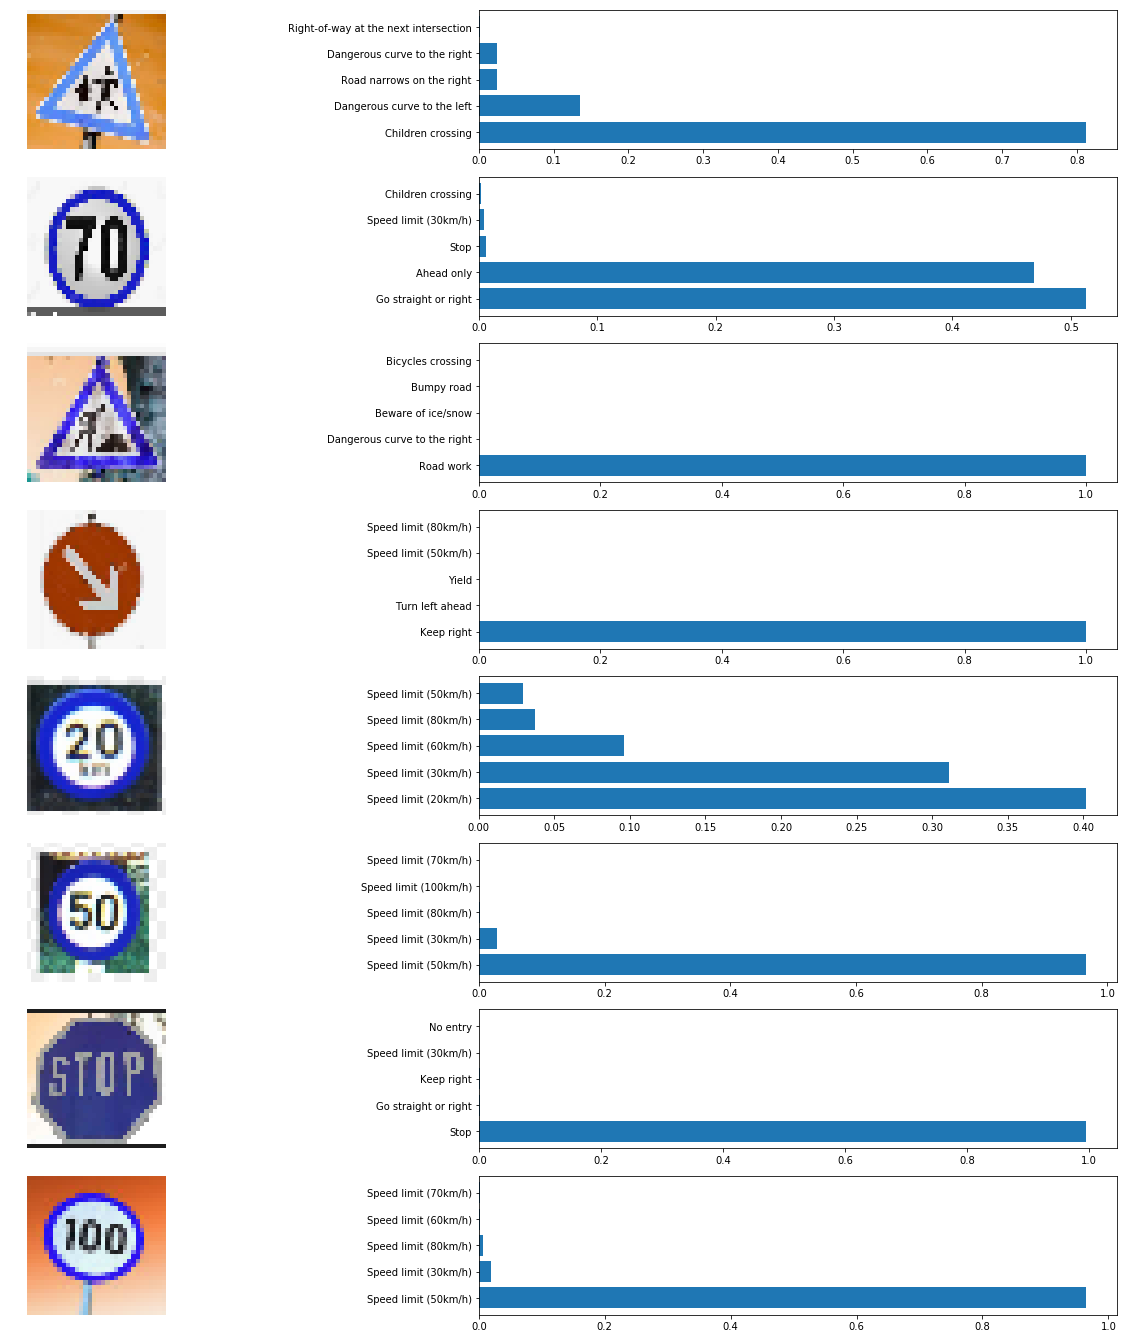

In [30]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.
softmax_logits = tf.nn.softmax(logits)
top_k=tf.nn.top_k(softmax_logits,5)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    top_k = sess.run(top_k, feed_dict={x: my_X_test_preProcessed, keep_prob : 1.0})
    
    visualizeTop_k(my_X_test, X_train, top_k)
    visualizeTop_k2(my_X_test, X_train, top_k)
    
print('done')

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.